# UTSA CS 3793/5233: Assignment-1

Summer 2021


**Last Name - First Name - (abc123)**






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies


## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**. 
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine (Informed Search) from the city with high supply (low demand) to the city with low supply (high demand).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


#Reading Data Files & Creating a 2D Graph

##(50 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

##Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [ ]:
# Add only your imports here
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"


In [ ]:
# Load the graph data from the files
city = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/cities.csv',header = None)
distance = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/distances.csv',header = None)

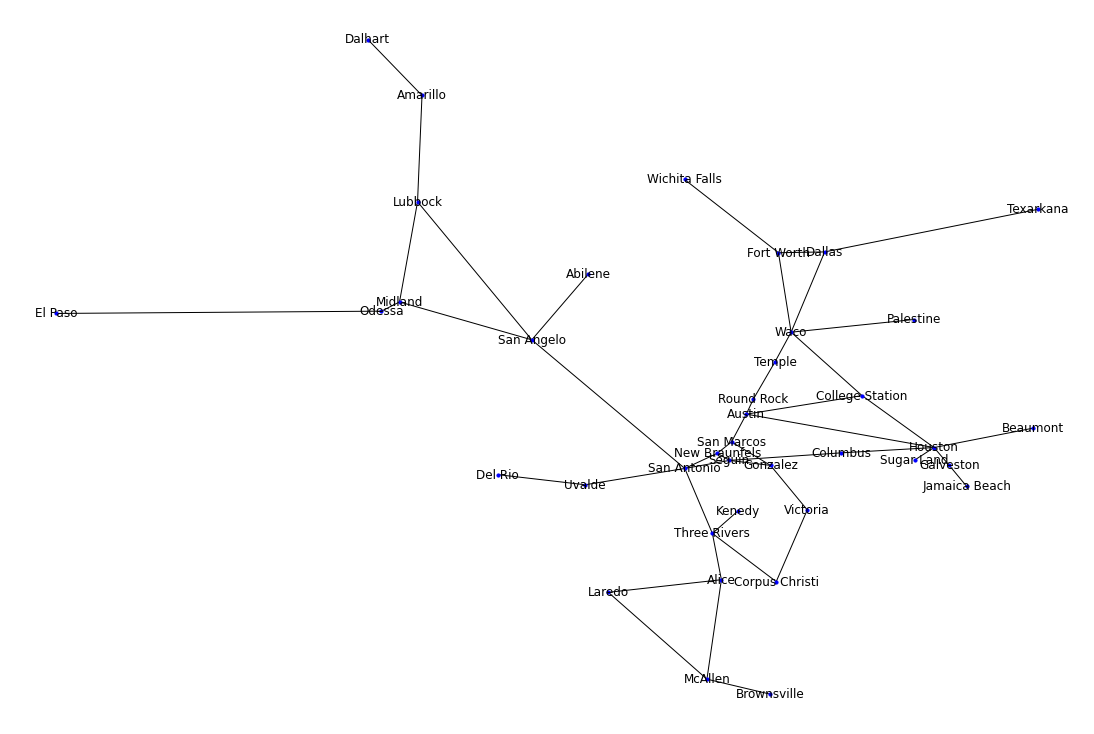

In [ ]:
# Display a 2D graph of the given data.
def add_edge_to_graph(G, e1, e2, w):
    G.add_edge(e1, e2, weight=w)
    
g = nx.Graph()

# edge 
for i, location in distance.iterrows():
    g.add_edge(location[0], location[1], dis = location[2])

# node 
for i, c in city.iterrows():
    g.add_node(c[0], longitude=c[1],latitude=c[2])
    #print(nlrow)

# Plotting
node_positions = {city[0]: (city[1]['latitude'], city[1]['longitude']) for city in g.nodes(data=True)}

plt.figure(figsize=(15, 10))
nx.draw(g, pos=node_positions, node_size=10, node_color='blue', with_labels= True)
plt.show()

###Reference : https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial

#Virus Spread - Uninformed Search Agent

##(50 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [ ]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'
frontier = [] 
queue = []    


def bfs(frontier, graph, node):

  frontier.append(node)
  queue.append(node)
  d = 0
  print("Path:", end = "\n")
  while queue:
    s = queue.pop(0) 
    print (s, end = "\n")  
    
    for neighbour in graph[s]:
      if neighbour not in frontier:
        frontier.append(neighbour)
        queue.append(neighbour)
        dist = g.get_edge_data(s,neighbour)['dis']
        d += dist
        
  print("The distance: ",d)

bfs(frontier, g,'Three Rivers' )


Path:
Three Rivers
San Antonio
Corpus Christi
Alice
Kenedy
San Angelo
New Braunfels
Seguin
Uvalde
Victoria
Laredo
McAllen
Midland
Lubbock
Abilene
San Marcos
Gonzalez
Columbus
Del Rio
Brownsville
Odessa
Amarillo
Austin
Houston
El Paso
Dalhart
Round Rock
College Station
Beaumont
Galveston
Sugar Land
Temple
Waco
Jamaica Beach
Palestine
Fort Worth
Dallas
Wichita Falls
Texarkana
The distance:  3354.31992298


###Reference: https://pythoninwonderland.wordpress.com/2017/03/18/how-to-implement-breadth-first-search-in-python/

#Vaccine Transportation - Informed Search Agent

##(50 points)

In this section, you will create an *informed search* agent that will be used to transport the vaccine. The city of **San Antonio** has more supply of vaccine than the demand. The goal is to create an **optimal strategy** to transport the vaccine and make it available at the highly affected city of **College Station**, where there is a shortage of vaccines.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print 

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [ ]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'San Antonio' to 'College Station'
import geopy.distance

#creating two list to prepare dictionary 
city_list = city[0].tolist()
distance_list = []
city_list = city[0].tolist()
distance_list = []

#query 
SAdf = city[(city[0] == "San Antonio")]

#mergign two lists to prepare dictionary
for l in range(len(city[1])):
  SA = (SAdf.iat[0,1], SAdf.iat[0,2])
  coords_2 = (city[1][l],city[2][l])
  distance_list.append(geopy.distance.vincenty(SA, coords_2).km)

dictionary= {city_list: distance_list for city_list, distance_list in zip(city_list, distance_list)}


   



def aStarAlgo(start_node, stop_node):
         
        open_set = set() 
        open_set.add(start_node)
        closed_set = set()
        g_store = {} #store distance from starting node
        parents = {}# parents contains an adjacency map of all nodes
        #ditance of starting node from itself is zero
        g_store[start_node] = 0
        #start_node is root node i.e it has no parent nodes
        #so start_node is set to its own parent node
        parents[start_node] = start_node
        sum = 0
        while len(open_set) > 0:
            n = None
 
            #node with lowest f() is found
            for v in open_set:
                if n == None or g_store[v] + heuristic(v) < g_store[n] + heuristic(n):
                    n = v
             
                     
            if n == stop_node or g[n] == None:
                pass
            else: 
                #print(get_neighbors(n))
                for (m, weight) in get_neighbors(n).items():
                    #nodes 'm' not in first and last set are added to first
                    #n is set its parent
                    if m not in open_set and m not in closed_set:
                        open_set.add(m)
                        parents[m] = n
                        g_store[m] = g_store[n] + weight['dis']
                         
     
                    #for each node m,compare its distance from start i.e g(m) to the
                    #from start through n node
                    else:
                        
                        if g_store[m] > g_store[n] +  weight['dis']:
                            #update g(m)
                            g_store[m] = g_store[n] +  weight['dis']
                            #change parent of m to n
                            parents[m] = n
                            
                            #if m in closed set,remove and add to open
                            if m in closed_set:
                                closed_set.remove(m)
                                open_set.add(m)
               
                         
            if n == None:
                print('Path does not exist!')
                return None
 
            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            
            if n == stop_node:
                path = []
 
                while parents[n] != n:
                    path.append(n)
                    n = parents[n]
                    dist = g.get_edge_data(n,path[-1])['dis']
                    #print(dist)
                    sum=sum+dist
                path.append(start_node)
                path.reverse()
                
                s= f'Path: {path} Distance: {sum}'
                return s
 
 
            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_set.remove(n)
            closed_set.add(n)
        
        
        print('Path does not exist!')
      
        return None
         
#define fuction to return neighbor and its distance
#from the passed node
def get_neighbors(v):
    if v in g:
        return g[v]
    else:
        return None
#for simplicity we ll consider heuristic distances given
#and this function returns heuristic distance for all nodes
def heuristic(n):
        dictionary
 
        return dictionary[n]
aStarAlgo('San Antonio', 'College Station')


"Path: ['San Antonio', 'New Braunfels', 'San Marcos', 'Austin', 'College Station'] Distance: 186.77450141000003"

###Reference:https://www.mygreatlearning.com/blog/a-search-algorithm-in-artificial-intelligence/

#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (50 points) Reading Data files & Creating a 2D Graph
*   (50 points) Virus Spread - Uninformed Search Agent
*   (50 points) Vaccine Transportation - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents



